In [8]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np  # for test data
import random  # for test data

import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(365)
random.seed(365)

In [11]:
# setup a sample dataframe; creates 1.5 months of hourly observations
data = {'date': pd.bdate_range('2020-09-21', freq='h', periods=1100).tolist(),
        'x': np.random.randint(10, size=(1100))}
df = pd.DataFrame(data)

# the date column of the sample data is already in a datetime format
# if the date column is not a datetime, then uncomment the following line
df.date= pd.to_datetime(df.date)

# define the bins
bins = [0, 6, 12, 18, 24]
# add custom labels if desired
labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
# add the bins to the dataframe
df['Time Bin'] = pd.cut(df.date.dt.hour, bins, labels=labels, right=False)

print(df.head())
df.info()

                 date  x     Time Bin
0 2020-09-21 00:00:00  5  00:00-05:59
1 2020-09-21 01:00:00  3  00:00-05:59
2 2020-09-21 02:00:00  0  00:00-05:59
3 2020-09-21 03:00:00  5  00:00-05:59
4 2020-09-21 04:00:00  2  00:00-05:59
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1100 non-null   datetime64[ns]
 1   x         1100 non-null   int32         
 2   Time Bin  1100 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 14.3 KB


In [35]:
dfg = df.groupby('Time Bin', as_index=False)['x'].agg([list, 'sum'])
# change the column names, if desired
dfg.columns = ['observations', 'bin_sum']
dfg

,observations,bin_sum
Time Bin,,
00:00-05:59,"[5, 3, 0, 5, 2, 2, 3, 4, 7, 0, 4, 1, 0, 0, 1, ...",1170
06:00-11:59,"[6, 2, 3, 4, 0, 2, 8, 1, 4, 0, 9, 3, 1, 0, 8, ...",1215
12:00-17:59,"[3, 8, 3, 0, 9, 3, 1, 6, 2, 7, 0, 9, 0, 9, 9, ...",1221
18:00-23:59,"[1, 4, 4, 5, 1, 5, 9, 3, 5, 3, 7, 6, 2, 5, 2, ...",1261


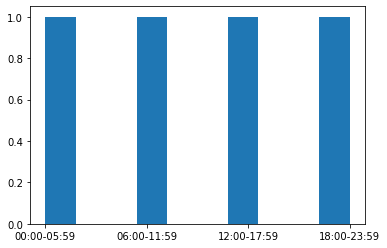

In [37]:
plt.hist(dfg.index);